In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
x_train, x_test = x_train / 255.0, x_test / 255.0
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

170500096/170498071 [==============================] - 3s 0us/step
x_train: (50000, 32, 32, 3)


In [41]:
model = tf.keras.models.Sequential([
    # first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [42]:
from tensorflow.keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, momentum = 0.9),
              metrics=['accuracy'])

In [43]:
history = model.fit(x_train, y_train, batch_size=50, epochs=15,validation_split=0.1)

Epoch 1/15
900/900 [==============================] - 4s 4ms/step - loss: 1.9422 - accuracy: 0.2804 - val_loss: 1.3593 - val_accuracy: 0.5176
Epoch 2/15
900/900 [==============================] - 3s 3ms/step - loss: 1.3275 - accuracy: 0.5237 - val_loss: 1.1769 - val_accuracy: 0.5874
Epoch 3/15
900/900 [==============================] - 3s 3ms/step - loss: 1.1358 - accuracy: 0.5930 - val_loss: 1.0329 - val_accuracy: 0.6446
Epoch 4/15
900/900 [==============================] - 3s 4ms/step - loss: 1.0014 - accuracy: 0.6479 - val_loss: 0.9722 - val_accuracy: 0.6642
Epoch 5/15
900/900 [==============================] - 3s 4ms/step - loss: 0.8835 - accuracy: 0.6895 - val_loss: 0.9245 - val_accuracy: 0.6818
Epoch 6/15
900/900 [==============================] - 3s 4ms/step - loss: 0.8205 - accuracy: 0.7148 - val_loss: 0.8737 - val_accuracy: 0.7064
Epoch 7/15
900/900 [==============================] - 3s 4ms/step - loss: 0.7412 - accuracy: 0.7379 - val_loss: 0.8649 - val_accuracy: 0.7004
Epoch 

In [10]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1), 
                model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1), 
                model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),
                      len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),
                model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1), 
                model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),
                      len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


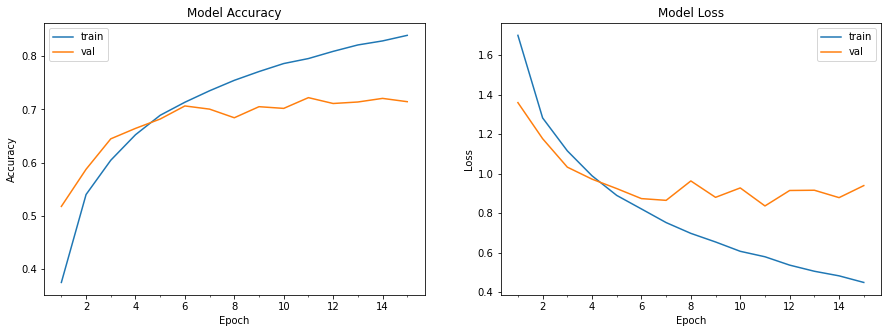

In [44]:
plot_model_history(history)

In [45]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.0036 - accuracy: 0.7045
0.7045000195503235
